***
# <div style="text-align: center">Biometrics Project</div>
# <div style="text-align: center">Iris Tracking using OpenCV and Dlib</div>

### <div style="text-align: right">RAMYA A<br>CB.EN.U4CSE18302</div>
### <div style="text-align: right">DHIVAKAR K<br>CB.EN.U4CSE18314</div>

***

# `Packages to be Installed`

In [1]:
# pip install cmake
# pip install dlib
# pip install opencv-python

***
# `Packages Used`

## `OpenCV` is a cross-platform library using which we can develop real-time computer vision applications. It mainly focuses on image processing, video capture and analysis including features like face detection and object detection.

## `Dlib` is a general purpose cross-platform software library written in the programming language C++, which contains software components for dealing with graphical user interfaces, data structures, linear algebra, machine learning, image processing, data mining, etc. 

## Some of the most popular mathematical functions are defined in the `math` module. These include trigonometric functions, representation functions, logarithmic functions, angle conversion functions, etc. In addition, two mathematical constants are also defined in this module.

## `NumPy` is a Python library used for working with arrays.It also has functions for working in domain of linear algebra, fourier transform, and matrices. NumPy aims to provide an array object that is up to 50x faster than traditional Python lists.
***
***

# Helen Dataset on which the classifier was built upon

### In our effort of building a facial feature localization algorithm that can  work dependably and precisely under a wide scope of appearance variation, including pose,lighting, expression, occlusion, and individual contrasts, we understand that it is vital that the raining set include high resolution examples so that, at test time, a high resolution test image can be fit precisely.
### Although a number of face databases exist,we discovered none that meet our necessities, especially the resolution requirement.Thus, they developed another dataset using annotated Flickr images.
* ### First, a large set of candidate photos was gathered using a variety of keyword searches on Flickr.  In all cases the query included the keyword "portrait" and was augmented with different terms such as "family", "outdoor", "studio", "boy", "wedding", etc.
* ### The subset was further filtered by hand to remove false positives, profile views, as well as low quality images. 
* ### For each accepted face, we generated a cropped version of the original image that includes the face and a proportional amount of background.  In some cases, the face is very close or in contact with the edge of the original image and is consequently not centered in the cropped image.  Also, the cropped image can contain other face instances since many photos contain more than one person in close proximity.
* ### Finally, the images were hand-annotated using Amazon Mechanical Turk to precisely locate the eyes, nose, mouth, eyebrows, and jawline.  

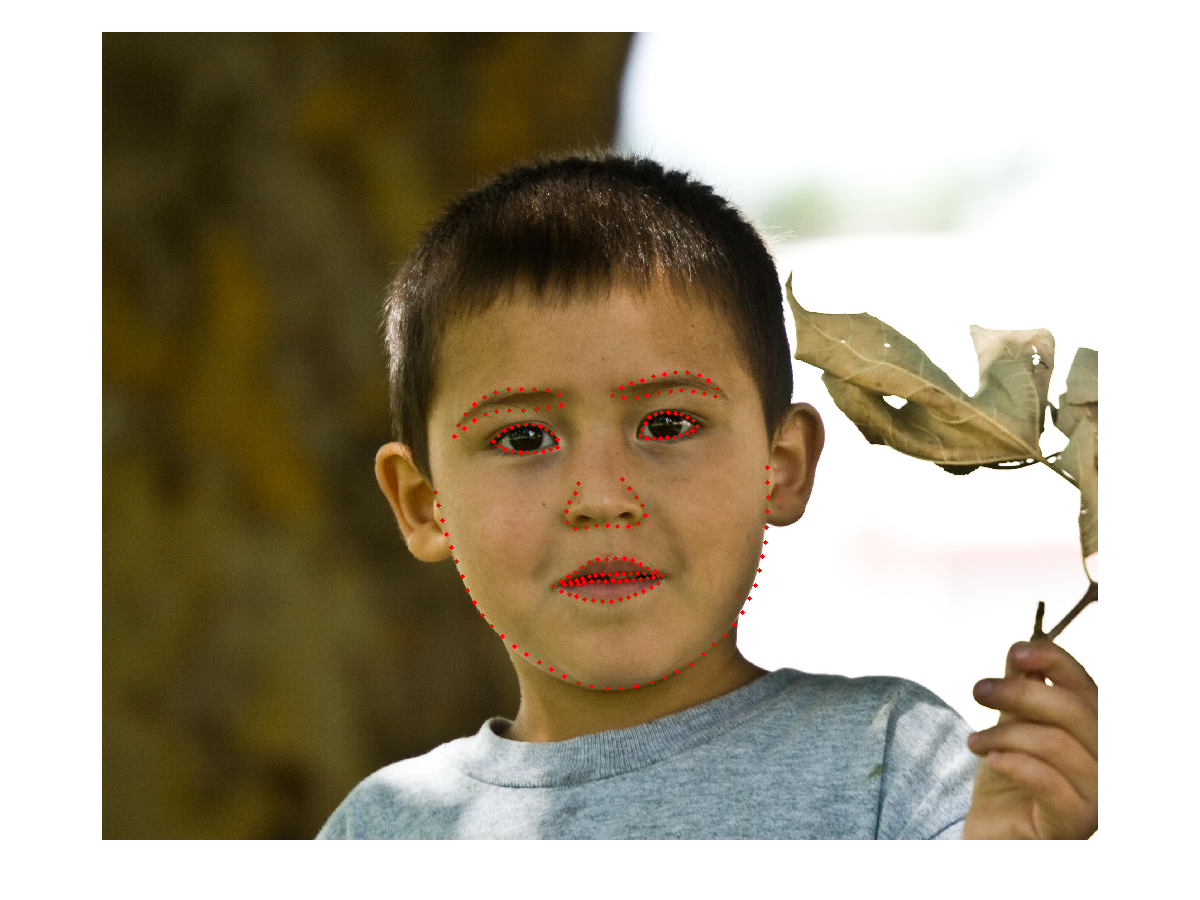

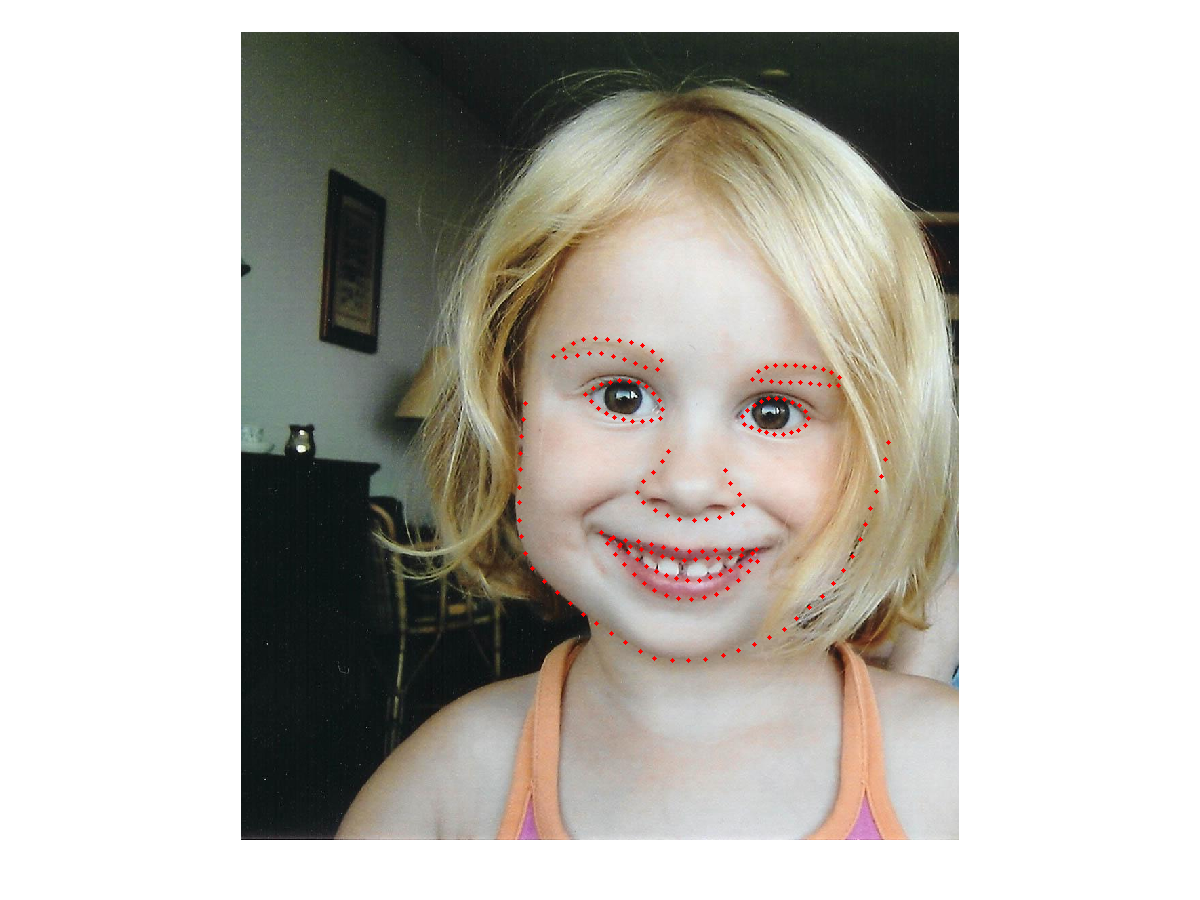

# Facial point annotations

## The majority of existing databases provide annotations for a relatively small subset of the overall images.
* ### The accuracy of provided annotations in some cases is not so good (probably due to human fatigue). 
* ### The annotation model of each database consists of a different number of landmarks. 
* ### These problems make cross-database experiments and comparisons between different methods almost infeasible. To overcome 8 * these difficulties, we propose a semi-automatic annotation methodology for annotating massive face datasets. This is the first * attempt to create a tool suitable for annotating massive facial databases. 

`Link` : https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/

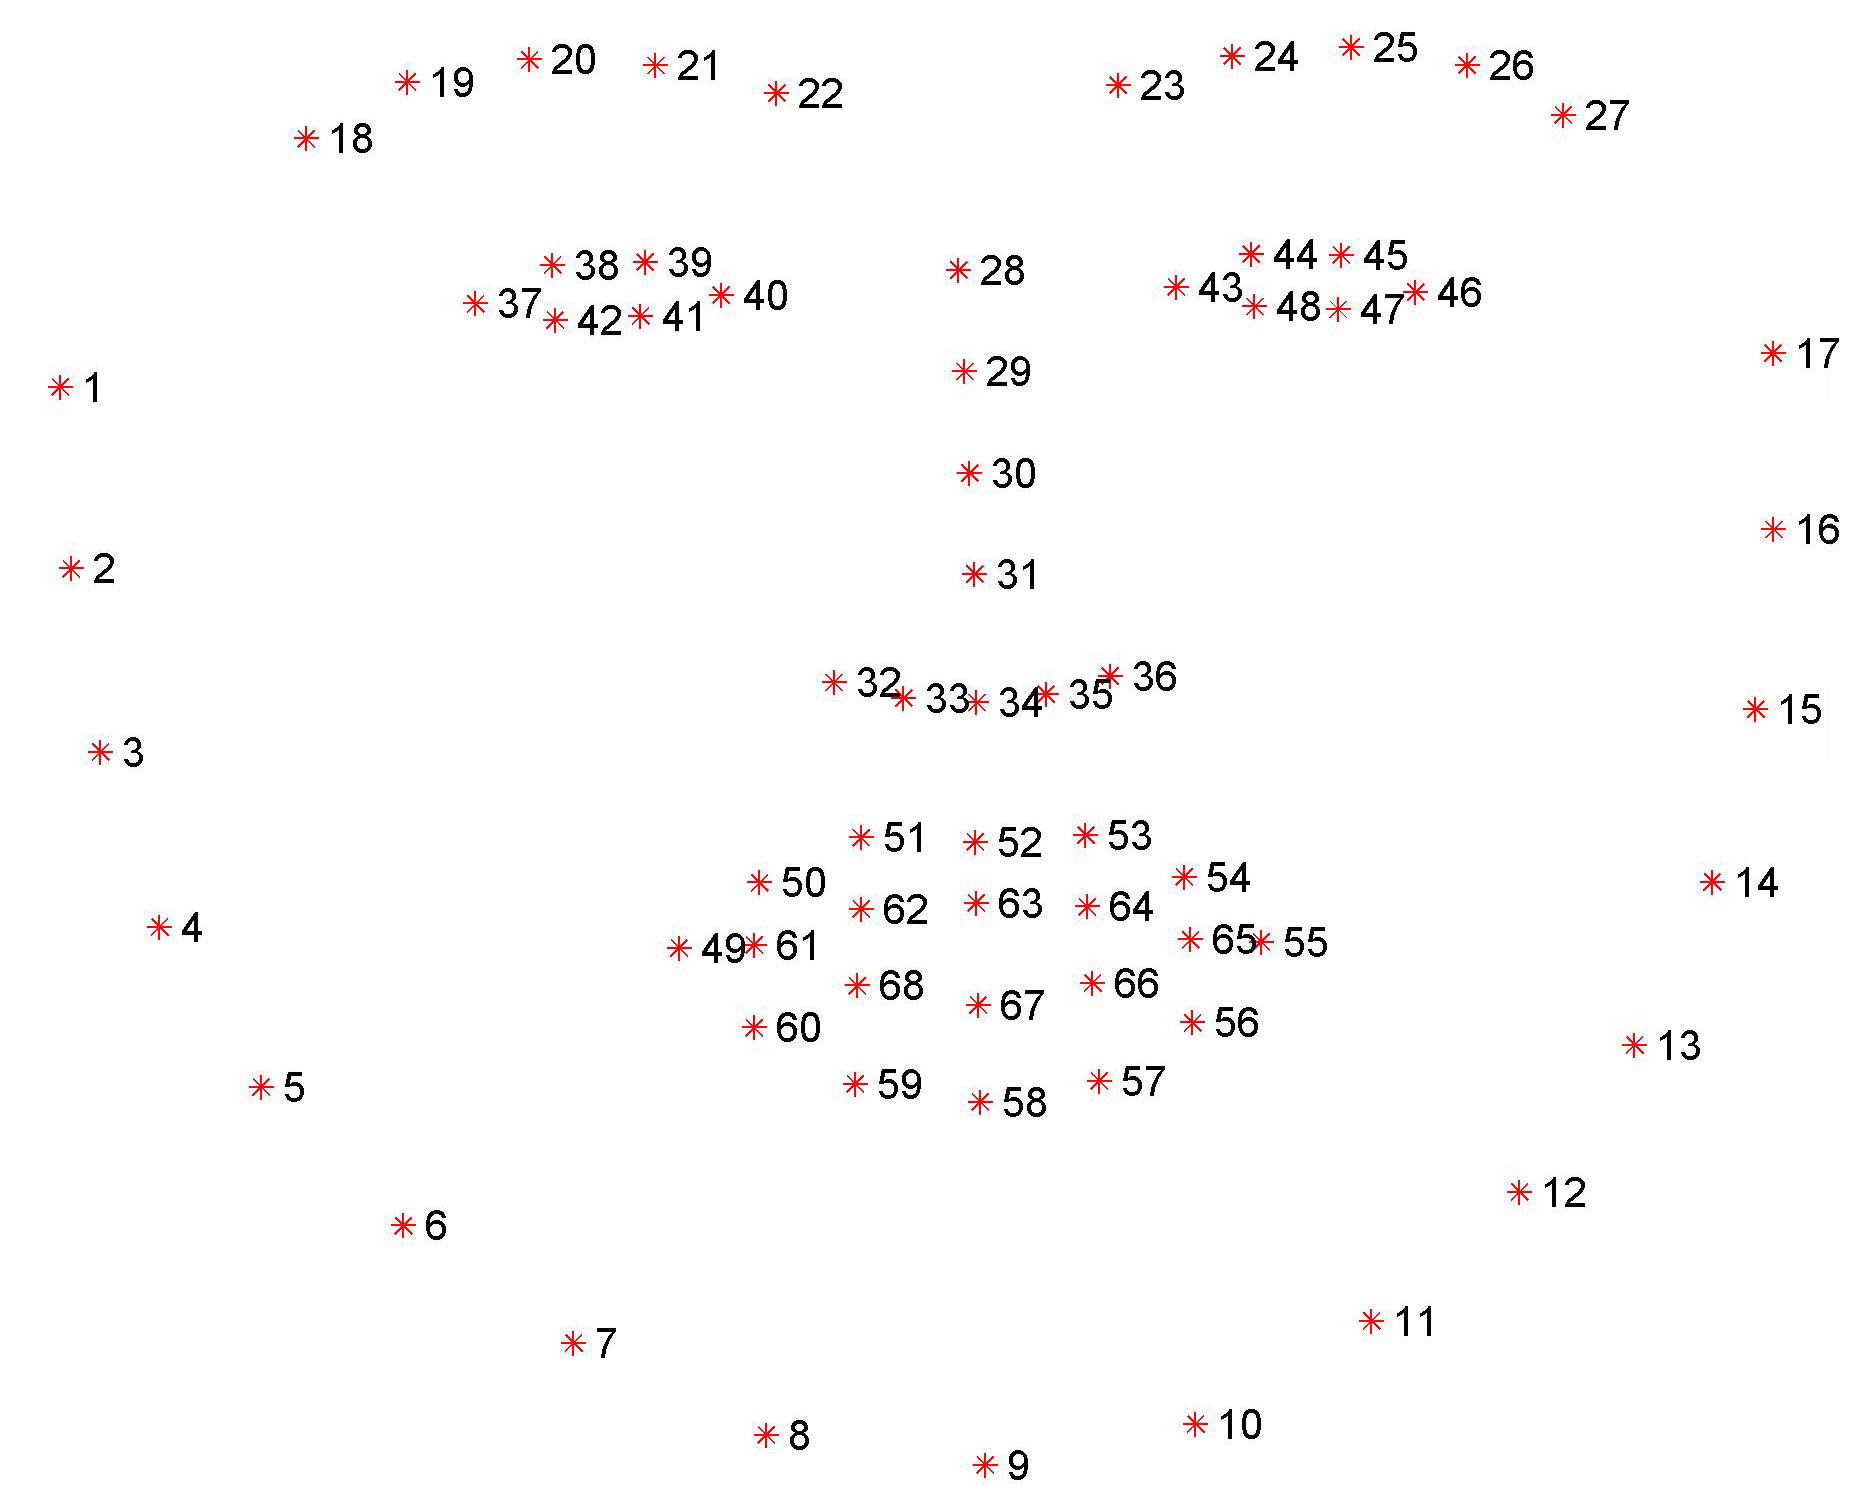

***
***
# Why Dlib and a pretrained cnn classifier was used?

### Dlib is an open source collaborative platform with impressive and efficient tools for image processing/computer vision. One of the reasons for choosing this over native python tools, is because it boosts efficiency and has a lot of prebuilt classifiers with legacy datasets. Its benefits are explained briefly in the following article.
https://learnopencv.com/face-detection-opencv-dlib-and-deep-learning-c-python/

### So from the above article, it’s clear that dlib classifiers run the best on CPU and give the best acceptable results. There was an even stronger reason to pick dlib, for its support of premade classifiers, such as the shape predictor we are using in our project. 

### The first thing to do is to find eyes before we can move on to image processing and to find the eyes we need to find a face. The facial keypoint detector takes a rectangular object of the dlib module as input which is simply the coordinates of a face.

### As explained in the dataset we used, we clearly established how facial annotation points identify and are indicative of various features of one's face. Dlib’s shape predictor tries to match these facial annotation points onto a subject's face effectively identifying various regions of interest/facial features.

### Using these annotated points, we can clearly identify various regions in the subject's face and at the same time confine the region of interest only to the face of the said individual. 

### By using a premade classifier, to archive these results, the following are the reasons:
* ### To successfully train the model, the minimum recommendation is a system with a cpu having 8 cores. Aside from the other limitations like ram, none of our systems met the minimum requirements for us to successfully train the model.
* ### The ram limitations posed a problem of higher computation time to train the models and at the same time may cause failures due to memory overhead.
* ### Aside from the above facts, the trained model would have its source code written and compiled in C++ (since Dlib is written and compiled in c++, however the original source code has been ensured to run in any language; which is something very specific to the libraries and programming constructs used; and dlib is an excutable file rather than actual source code that is excuted in real time).

In [2]:
import cv2
# cv2 is OpenCV
import dlib
import numpy as np
import math
import matplotlib.pyplot as plt

***
***
# `Class Iris` which is in the following cell has two main functions:
* ## Processing the image to effectively mask out the required information, which in this case is Iris. 
* ## Detecting the region of sclera and iris.

***

## Function pre_processing:
### The pre processing function  first applies a 3x3 Kernel, Kernels in computer vision are matrices, used to perform some kind of convolution in our data.
### Convolutions are mathematical operations between two functions that create a third function. In image processing, it happens by going through each pixel to perform a calculation with the pixel and its neighbours.
### The kernels will define the size of the convolution, the weights applied to it, and an anchor point usually positioned at the center. So in a 3x3 matrix, each pixel is affected only by the pixels around it.

### So what can kernels do?
* ### We can filter and modify images by interacting with their pixels;
* ### That interaction may occur with convolutions;
* ### Those convolutions use kernels to describe how the pixels will be affected;
* ### Kernels represent the area for each operation, the values/weights, and the anchor point.

### After that bilateral filter is applied to the frame(video is made up of images, a frame is one of such images). A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels(this neighbourhood is defined by the kernel). This weight can be based on a Gaussian distribution. Crucially, the weights depend not only on Euclidean distance of pixels, but also on the radiometric differences (e.g., range differences, such as color intensity, depth distance, etc.). This preserves sharp edges. It is very important to preserve these sharp edges because only then the color intensity difference between the sclera and iris becomes evident.

## The bilateral filter is defined as
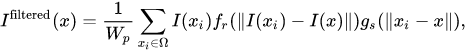

### Following the bilateral filter, we perform a morphological process calles erode. Erosion is one of two fundamental operations (the other being dilation) in morphological image processing from which all other morphological operations are based. It erodes away the boundaries of foreground object (Always try to keep foreground in white). 
### So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero). So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. 
### So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

## The erosion of the binary image A by the structuring element B is defined by:



### Finally the image is thresholded, to cleary distinguish the iris from the sclera. In digital image processing, thresholding is the simplest method of segmenting images. From a grayscale image, thresholding can be used to create binary images. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 

***

## Function detect_iris:

### This function first calls the processing function to receive the image of an eye alone. 

### It's folllowed by finding contours to distinguish the iris from the sclera. Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity. Contours come handy in shape analysis, finding the size of the object of interest, and object detection. The intensity difference is between the sclera(white part of the eye) and iris(which is a grey/black color, since the image is in greyscale).

### OpenCV has findContour() function that helps in extracting the contours from the image. It works best on binary images(which is solved by thresholding the image in the previous stage), so we should first apply thresholding techniques, Sobel edges, etc.

### Then these contours are sorted w.r.t. to area to better represent this in array form. By arranging the contours w.r.t area, the largest contour indicates the entire iris. Thats what is done in the try block to extract this region of the largest non-white region within an eye. This largest non-white region is actually the iris.

### By performing the above functions an image of an eye is processed and the iris within it is detected.

In [3]:
class Iris(object):
    def __init__(self, eye_frame, threshold):
        self.iris_frame = None
        self.threshold = threshold
        self.x = None
        self.y = None
        self.detect_iris(eye_frame)

    @staticmethod
    def pre_processing(eye_frame, threshold):
        kernel = np.ones((3, 3), np.uint8)
        new_frame = cv2.bilateralFilter(eye_frame, 10, 15, 15)
        new_frame = cv2.erode(new_frame, kernel, iterations=3)
        new_frame = cv2.threshold(new_frame, threshold, 255, cv2.THRESH_BINARY)[1]
        return new_frame

    def detect_iris(self, eye_frame):
        self.iris_frame = self.pre_processing(eye_frame, self.threshold)
        contours, _ = cv2.findContours(self.iris_frame, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[-2:]
        contours = sorted(contours, key=cv2.contourArea)
        try:
            moments = cv2.moments(contours[-2])
            self.x = int(moments['m10'] / moments['m00'])
            self.y = int(moments['m01'] / moments['m00'])
        except (IndexError, ZeroDivisionError):
            pass

***
***
# `Class Eye` which is in the following cell has three main functions:
* ## _middle_point which returns the center of the eye
* ## _isolate has one primary function, i.e. isolate the portion of the eye from the rest of the image.
* ## _analyse on the other hand which eye it is, wheter its left or right. and then with this information drives the above two code and also call the Threshold to identify the lighting situation and return an optimal threshold value. No further explanation is required for this function.

***
## Function _middle_point:
### It is the most straight forward function with only one objective, given the least x coordinate and largest x coordinate, it returns the mean or effectively the center of the iris's x coordinate. The same is repeated for the y coordinates as well.

***
## Function _isolate:
### By far this is the most important funtion in this project. It tries to identify the region of eye, from the entire frame. This means that given an eye(left or right), it detects the eye within the face, by matching the facial annoations points mapped to the subjects face with that of regular facial annoations points. This regular points are given by LEFT_CORDINATES and RIGHT_CORDINATES, which are part of the 68 landmarks given by the shape predictor. 
### So the first thing it does is using list comrehension, reads all the points in the assigned annotation points within LEFT_CORDINATES or RIGHT_CORDINATES, So basically an np array representation of these annotation points(X,Y coordinates of these points which are mapped onto the subjects face). 
### After that with height and width of the frame, a complete black frame is created using np.zeroes. Since images are just matrices filled with 0,1 representing the intensities of image, by filling the entire image with 0, we get a image with RGB #000000(Black). This black frame is used for the computation of masks to perform tasks on specifc roi(Regions of intersest).
### Then a polygon mask is created using fillpoly, with the points computed earlier. So this effectively is indicative of our regions of interest and these coordinates the corressponding pixels have a value of 1(basically a white region). 
### The function cv::fillPoly fills an area bounded by several polygonal contours. The function can fill complex areas, for example, areas with holes, contours with self-intersections (some of their parts), and so forth.
### The next step is the step for which the previous computations have been done. Bascically what it does takes a copy of the frame and masks it out using the mask computed in the previous step. So a not operation is done with black frame on top of the frame.copy. Whereever the mask(each pixel is a value in an np.array) has a value of 1, the corresponding pixel in our frame will be visible and will be exempt of the operation of not. This masked frame is then saved on the eye.
### In simpler terms assume u have an printed image and a piece of black paper with the same dimensions of the printout. So lets says you cut out portions of the black paper coresponding to that of the masks. And then when allign these two papers, you can only see through this cut out region, and this exactly is what that is happening on performing a bitwise not operation on these images. So basically it is a arthimetric operation perfomed on an image.
### The next lines of code assign the instance variables with rectanagular cropped images of only the eye, by figuring our the min and max coordinates in the facial annotaion points for x axis and y axis. The origin of the frame is the min coordinates of both the images followed by center of image computed by the center of height and width of the image.

In [4]:
class Eye(object):
    LEFT_CORDINATES = [36, 37, 38, 39, 40, 41]
    RIGHT_CORDINATES = [42, 43, 44, 45, 46, 47]

    def __init__(self, original_frame, landmarks, side, calibration):
        self.frame = None
        self.origin = None
        self.center = None
        self.pupil = None

        self._analyze(original_frame, landmarks, side, calibration)

    @staticmethod
    def _middle_point(p1, p2):
        x = int((p1.x + p2.x) / 2)
        y = int((p1.y + p2.y) / 2)
        return (x, y)

    def _isolate(self, frame, landmarks, points):
        region = np.array([(landmarks.part(point).x, landmarks.part(point).y) for point in points])
        region = region.astype(np.int32)
        height, width = frame.shape[:2]
        black_frame = np.zeros((height, width), np.uint8)
        mask = np.full((height, width), 255, np.uint8)
        cv2.fillPoly(mask, [region], (0, 0, 0))
        eye = cv2.bitwise_not(black_frame, frame.copy(), mask=mask)
        margin = 5
        min_x = np.min(region[:, 0]) - margin
        max_x = np.max(region[:, 0]) + margin
        min_y = np.min(region[:, 1]) - margin
        max_y = np.max(region[:, 1]) + margin

        self.frame = eye[min_y:max_y, min_x:max_x]
        self.origin = (min_x, min_y)

        height, width = self.frame.shape[:2]
        self.center = (width / 2, height / 2)

    def _analyze(self, original_frame, landmarks, side, calibration):
        if side == 0:
            points = self.LEFT_CORDINATES
        elif side == 1:
            points = self.RIGHT_CORDINATES
        else:
            return

        self._isolate(original_frame, landmarks, points)

        if not calibration.is_complete():
            calibration.evaluate(self.frame, side)

        threshold = calibration.threshold(side)
        self.pupil = Iris(self.frame, threshold)

***
***
# `Class Threshold` which is in the following cell has the following functions:
* ## is_complete is a function which checks that the length of left and right thresholds are greater that a predetermined constant. No further explanation is required.
* ## threshold on the other hand computes the the mean of left or right threshold values(indictive of left side and right side of the face, ensures both parts of the face is visible). No further explanation is required.
* ## iris_size on the other hand computes how much times the black pixels in your iris image are greater than that of the pixels that have data within(which is the iris). This is indicative of the darkest ratio between the darkest point(shadows) from that of brightest point in the image(highlights). No further explanation is required.
* ## find_best_threshold on the other hand iteratively finds out the above ratio within the iris frame, and assigns a threshold value capable of distinguishing the iris from that of the sclera, which happens to be the minimum of above ratios. No further explanation is required.
* ## evaluate is just a driver function which drives the above functions based on left or right side

In [5]:
class Threshold(object):
    def __init__(self):
        self.nb_frames = 20
        self.thresholds_left = []
        self.thresholds_right = []

    def is_complete(self):
        return len(self.thresholds_left) >= self.nb_frames and len(self.thresholds_right) >= self.nb_frames

    def threshold(self, side):
        if side == 0:
            return int(sum(self.thresholds_left) / len(self.thresholds_left))
        elif side == 1:
            return int(sum(self.thresholds_right) / len(self.thresholds_right))

    @staticmethod
    def iris_size(frame):
        frame = frame[5:-5, 5:-5]
        height, width = frame.shape[:2]
        nb_pixels = height * width
        nb_blacks = nb_pixels - cv2.countNonZero(frame)
        return nb_blacks / nb_pixels

    @staticmethod
    def find_best_threshold(eye_frame):
        average_iris_size = 0.48
        trials = {}

        for threshold in range(5, 100, 5):
            iris_frame = Iris.pre_processing(eye_frame, threshold)
            trials[threshold] = Threshold.iris_size(iris_frame)

        best_threshold, iris_size = min(trials.items(), key=(lambda p: abs(p[1] - average_iris_size)))
        return best_threshold

    def evaluate(self, eye_frame, side):
        threshold = self.find_best_threshold(eye_frame)

        if side == 0:
            self.thresholds_left.append(threshold)
        elif side == 1:
            self.thresholds_right.append(threshold)

***
***
# `Class IrisTracking` is basically like the driver function for the above code for each frame of the image.
***
## Function pupils_located:
### The function just validates if the coordinates of repective pupils are integers, effectively also checking if they have some value assigned to them.
***
## Function _analyse:
### This function converts the image into greyscale, an unsaid rule in image processing and in any other computation is to not have extra unnecessary information or in better words dimensionality reduction. So untill and unless the processing requires colour for its computation, the best way is to avoid the use of colour in general. Apart from that certain functions in the above code are in need of a greyscale image input.
### Then using our illustrious shape predictor of 68 landmarks we detect the face within a frame. It then in try block, checks if landmarks can be extracted, which are the facial annotation points, and then pass them to detect the left and right eye.
***
## Function refresh:
### The simplest function so far, it takes the next frame from the video feed to compute the movement of iris within that frame.
***
## Function pupil_left_coords:
### Returns the x and y coordinates of the left eye.

***

## Function pupil_right_coords:
### Returns the x and y coordinates of the right eye.
***
## Function x_mean_displacement:
### Returns the x axis displacement of the left and right iris from its origin
***
## Function y_mean_displacement:
### Returns the y axis displacement of the left and right iris from its origin.
***
## Function shape_to_np:
### Converts the landmark points into its numpy array representation for future computation.
***
## Function annotated_frame:
### Returns the frame with points, lines and rectanagles printed on top of our input feed to indicate the output of previous functions.

In [6]:
class IrisTracking(object):
    def __init__(self):
        self.frame = None
        self.eye_left = None
        self.eye_right = None
        self.calibration = Threshold()
        self._face_detector = dlib.get_frontal_face_detector()
        #  model_path = add path to shapepredictor 68 facial annotation points
        self._predictor = dlib.shape_predictor(model_path)

    @property
    def pupils_located(self):
        try:
            int(self.eye_left.pupil.x)
            int(self.eye_left.pupil.y)
            int(self.eye_right.pupil.x)
            int(self.eye_right.pupil.y)
            return True
        except Exception:
            return False

    def _analyze(self):
        frame = cv2.cvtColor(self.frame, cv2.COLOR_BGR2GRAY)
        faces = self._face_detector(frame)

        try:
            landmarks = self._predictor(frame, faces[0])
            self.eye_left = Eye(frame, landmarks, 0, self.calibration)
            self.eye_right = Eye(frame, landmarks, 1, self.calibration)

        except IndexError:
            self.eye_left = None
            self.eye_right = None

    def refresh(self, frame):
        self.frame = frame
        self._analyze()

    def pupil_left_coords(self):
        if self.pupils_located:
            x = self.eye_left.origin[0] + self.eye_left.pupil.x
            y = self.eye_left.origin[1] + self.eye_left.pupil.y
            return (x, y)

    def pupil_right_coords(self):
        if self.pupils_located:
            x = self.eye_right.origin[0] + self.eye_right.pupil.x
            y = self.eye_right.origin[1] + self.eye_right.pupil.y
            return (x, y)

    def x_mean_displacement(self):
        if self.pupils_located:
            pupil_left = self.eye_left.pupil.x / (self.eye_left.center[0] * 2 - 10)
            pupil_right = self.eye_right.pupil.x / (self.eye_right.center[0] * 2 - 10)
            return (pupil_left + pupil_right) / 2

    def y_mean_displacement(self):
        if self.pupils_located:
            pupil_left = self.eye_left.pupil.y / (self.eye_left.center[1] * 2 - 10)
            pupil_right = self.eye_right.pupil.y / (self.eye_right.center[1] * 2 - 10)
            return (pupil_left + pupil_right) / 2

    def shape_to_np(self, shape, dtype="int"):
        coords = np.zeros((68, 2), dtype=dtype)
        for i in range(0, 68):
            coords[i] = (shape.part(i).x, shape.part(i).y)
        return coords

    def annotated_frame(self):
        frame = self.frame.copy()
        faces = self._face_detector(frame)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        if self.pupils_located:
            colour = (0, 255, 0)
            color = (0,0,255)
            colorb= (255,0,0)
            x_left, y_left = self.pupil_left_coords()
            x_right, y_right = self.pupil_right_coords()
            landmarks = self._predictor(frame, faces[0])
            shape=self.shape_to_np(landmarks)
            x_min,x_max,y_min,y_max=min(shape[:,0]),max(shape[:,0]),min(shape[:,1]),max(shape[:,1])
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), colour, 2)
            for (x, y) in shape:
                cv2.circle(frame, (x, y), 1, colour, -1)
            cv2.line(frame, (x_left - 5, y_left), (x_left + 5, y_left), colorb)
            cv2.line(frame, (x_left, y_left - 5), (x_left, y_left + 5), colorb)
            cv2.line(frame, (x_right - 5, y_right), (x_right + 5, y_right), colorb)
            cv2.line(frame, (x_right, y_right - 5), (x_right, y_right + 5), colorb)
            cv2.circle(frame, (x_right, y_right), 5,color=color)
            cv2.circle(frame, (x_left, y_left), 5,color=color)
        return frame

***
***
## The following code is the actual driver code for the previous codes.
***
## Function direction:
### Based on the x_mean_displacement and y_mean_displacement it calculates if the given subject is lloking up,down,left,right,center or away(face not detected)
***
### Followed by the above function we set up the previous IrisTracking class and a cv2.VideoCapture object to read the feed from our webcams. In a while loop each frame is passed onto the IrisTracking Class by calling its umpteen number of functions. And then procceds to give output based on the outputs of the previous classes.

In [7]:
def direction(f):  
    if tracker.pupils_located:
        if(f%10==0):
            print("Y axis mean displacement:",tracker.y_mean_displacement())
            print("X axis mean displacement:",tracker.x_mean_displacement())
        if tracker.x_mean_displacement() >= 0.8:
            return 1
        elif tracker.x_mean_displacement() <= 0.5:
            return 2
        elif tracker.y_mean_displacement()<=0.7:
            return 3
        elif tracker.y_mean_displacement()>=1.25:
            return 4
        elif tracker.x_mean_displacement() < 0.8 and tracker.x_mean_displacement() > 0.5:
            return 5
        return 0

tracker = IrisTracking()
webcam = cv2.VideoCapture(0, cv2.CAP_DSHOW)
webcam.set(cv2.CAP_PROP_FPS , 30)
u,d,l,r,c,a=0,0,0,0,0,0
fps = webcam.get(cv2.CAP_PROP_FPS)
print("Frames per second (FPS): {0}".format(fps))
f=0
while True:
    _, frame = webcam.read()
    tracker.refresh(frame)
    new_frame = np.zeros((480,640, 3), np.uint8)
    frame = tracker.annotated_frame()
    text = ""
    val=direction(f)
    if val==1:
        text = "Stop Looking left"
        new_frame[:] = (255,0,0)
        l+=1
        if(f%10==0):
            print("Left\n")
    elif val==2:
        text = "Stop Looking right"
        new_frame[:] = (0, 0, 255)
        r+=1
        if(f%10==0):
            print("Right\n")
    elif val==3:
        text = "Stop Looking Up"
        new_frame[:] = (0,255,255)
        u+=1
        if(f%10==0):
            print("Up\n")
    elif val==4:
        text = "Stop Looking Down"
        new_frame[:] = (255, 255, 0)
        d+=1
        if(f%10==0):
            print("Down\n")
    elif val==5:
        text = "Looking center"
        new_frame[:] = (0,255,0)
        c+=1
        if(f%10==0):
            print("Center\n")
    else:
        a+=1
        text = "Look at the camera properly(Away)"
    cv2.putText(frame, text, (90, 60), cv2.FONT_HERSHEY_DUPLEX, 1.6, (147, 58, 31), 2)

    left_pupil = tracker.pupil_left_coords()
    right_pupil = tracker.pupil_right_coords()
    cv2.putText(frame, "Left pupil:  " + str(left_pupil), (90, 130), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)
    cv2.putText(frame, "Right pupil: " + str(right_pupil), (90, 165), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)

    cv2.imshow("VideoCapture", frame)
    cv2.imshow("Result", new_frame)
    if cv2.waitKey(1) == 113:
        break
    f+=1

webcam.release()
cv2.destroyAllWindows()

Frames per second (FPS): 30.00003000003
Y axis mean displacement: 0.8397435897435898
X axis mean displacement: 0.6695488721804511
Center

Y axis mean displacement: 1.0
X axis mean displacement: 0.5642857142857143
Center

Y axis mean displacement: 1.0
X axis mean displacement: 0.5824420677361855
Center



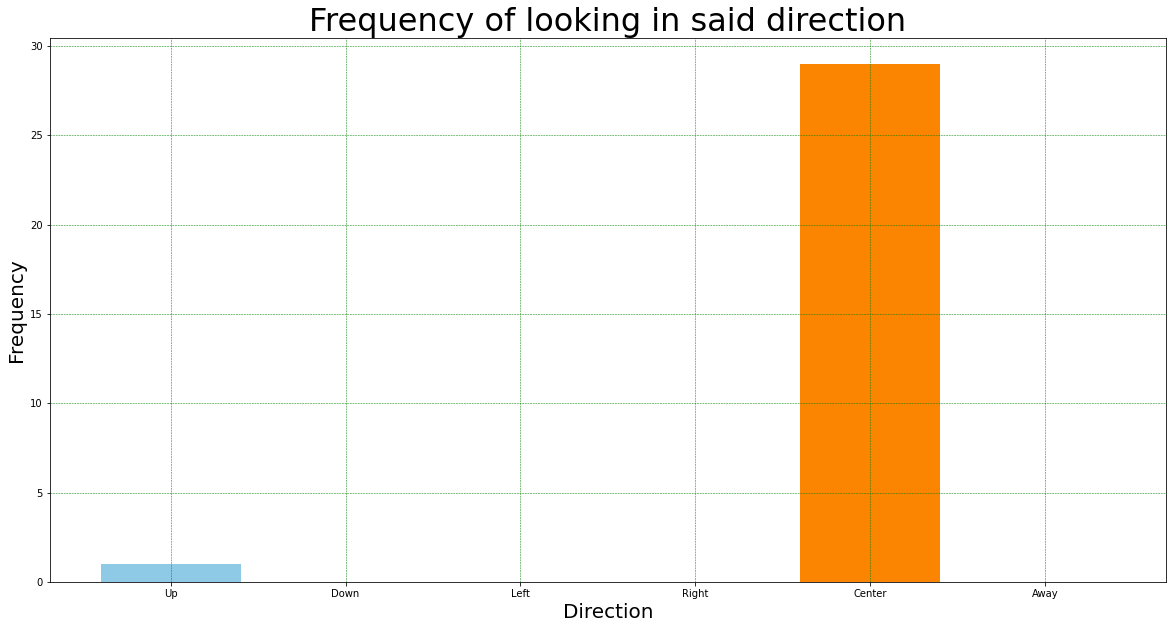

In [8]:
lst=[u,d,l,r,c,a]
direction=["Up",'Down','Left','Right','Center','Away']
plt.figure(figsize= (20,10))
plt.bar(direction,lst,color=['#8ecae6', '#219ebc', '#023047', '#ffb703', '#fb8500'])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("Frequency of looking in said direction",{'fontsize': 32})
plt.xlabel("Direction",{'fontsize': 20})
plt.ylabel("Frequency",{'fontsize': 20})
plt.show()

## Probabilty of Cheating

This is a randomness function which is built upon fictional business rules

In [2]:
poc=((u/10+d*10+l+r-a)/(c-a))*100
poc

NameError: name 'u' is not defined